# Свёрточные нейронные сети. Часть 1.

## Переключение версии TensorFlow

In [1]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

## Загрузка и подготовка датасета MNIST

In [3]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

train_x = train_x.reshape(-1, 28, 28, 1).astype(np.float32) / 255.
test_x = test_x.reshape(-1, 28, 28, 1).astype(np.float32) / 255.

print(train_x.shape, train_x.dtype)
print(test_x.shape, test_x.dtype)
print(train_y.shape, train_y.dtype)
print(test_y.shape, test_y.dtype)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1) float32
(10000, 28, 28, 1) float32
(60000,) uint8
(10000,) uint8


## Визуализация датасета MNIST

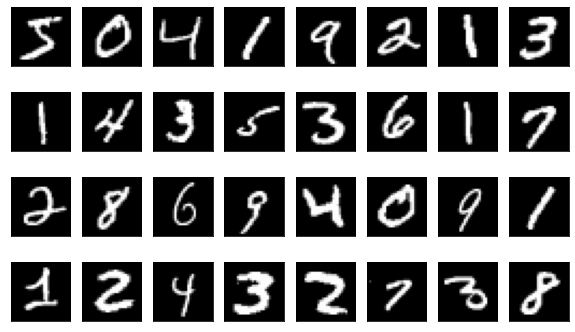

In [4]:
some_samples = train_x[:32, ...]

fig = plt.figure(figsize=(10, 6))
for j in range(some_samples.shape[0]):
    ax = fig.add_subplot(4, 8, j+1)
    ax.imshow(some_samples[j,:,:,0], cmap='gray')
    plt.xticks([]), plt.yticks([])
plt.show()

## Создание модели CNN

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2), (2, 2)),
    tf.keras.layers.Conv2D(64, (5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2), (2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

## Подготовка к обучению

In [6]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Обучение модели

In [7]:
NUM_EPOCHS = 4

model.fit(train_x, train_y, epochs=NUM_EPOCHS)

Epoch 1/4
1875/1875 [==============================] - 20s 4ms/step - loss: 0.4347 - accuracy: 0.8697
Epoch 2/4
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1176 - accuracy: 0.9656
Epoch 3/4
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0814 - accuracy: 0.9749
Epoch 4/4
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0642 - accuracy: 0.9801


## Оценка качества модели

In [8]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 2s 5ms/step - loss: 0.0513 - accuracy: 0.9838


[0.05127463862299919, 0.9837999939918518]

## Пример инференса модели

In [ ]:
sample = test_x[0, ...]
prediction = model(sample[None, ...])[0]
print(prediction)

tf.Tensor(
[7.3507198e-07 8.3028175e-07 2.5742671e-05 3.3747352e-04 1.1877451e-09
 3.8906725e-07 4.8755487e-13 9.9959892e-01 9.5400800e-08 3.5944464e-05], shape=(10,), dtype=float32)


## Функция для инференса и отображения результата предсказания

In [ ]:
def test_digit(sample):
    
    prediction = model(sample[None, ...])[0]
    ans = np.argmax(prediction)
    
    fig = plt.figure(figsize=(12,4))

    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(sample[:,:,0], cmap='gray')
    plt.xticks([]), plt.yticks([])

    ax = fig.add_subplot(1, 2, 2)
    bar_list = ax.bar(np.arange(10), prediction, align='center')
    bar_list[ans].set_color('g')
    ax.set_xticks(np.arange(10))
    ax.set_xlim([-1, 10])
    ax.grid(True)

    plt.show()
    
    print('Predicted number: {}'.format(ans))

## Запуск предсказания для изображения случайной цифры из MNIST

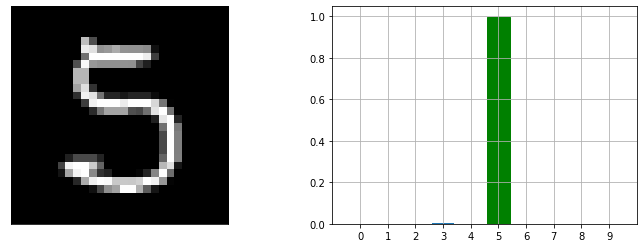

Predicted number: 5
True Answer: 5


In [ ]:
import random
idx = random.randint(0, test_x.shape[0])
sample = test_x[idx, ...]
test_digit(sample)

print('True Answer: {}'.format(test_y[idx]))

## Запуск предсказания на нашем изображении

In [ ]:
def load_and_prepare_image(fpath):
    import imageio
    from skimage.transform import resize
    img = imageio.imread(fpath, pilmode="RGB")
    img = img.astype(np.float32)/255
    img = resize(img, (28, 28), order=3, mode='reflect', anti_aliasing=True)
    img = (1. - img).astype(np.float32)
    img = np.mean(img, axis=2)
    img = np.reshape(img, (28, 28, 1))
    return img

if 1:
    !wget https://raw.githubusercontent.com/dkorobchenko-nv/dl-demo/master/mnist/digit.png

--2020-03-04 19:40:48--  https://raw.githubusercontent.com/dkorobchenko-nv/dl-demo/master/mnist/digit.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16356 (16K) [image/png]
Saving to: ‘digit.png’

digit.png           100%[===================>]  15.97K  --.-KB/s    in 0.007s  

2020-03-04 19:40:48 (2.30 MB/s) - ‘digit.png’ saved [16356/16356]



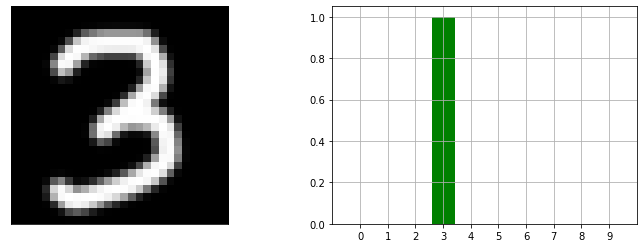

Predicted number: 3


In [ ]:
img = load_and_prepare_image('./digit.png')
test_digit(img)